In [573]:
# Это пример выгрузки, а также обработки некоторых строковых данных и изменение типа

import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns

df = pd.read_csv('../mvideo_features.csv')

df.head(3)

,product_id,name,brand,Гарантия,Гарантия предоставляется,Страна,Год релиза,Серия,Состояние,Внешний вид,...,Разрешение дополнительного экрана по вертикали (Пикс),Разрешение дополнительного экрана по горизонтали (Пикс),Складной смартфон,Встроенный искусственный интеллект,Проводная гарнитура,Micro-SIM,Гарантия на аксессуары (мес.),Гарантия на АКБ (мес.),Дополнительная комплектация,Сканер радужной оболочки глаза
0,30063534,Смартфон Apple iPhone 13 128GB nanoSim/eSim Mi...,Apple,1 год,продавцом,Китай,2021.0,iPhone 13,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400410049,Смартфон HONOR X9c 12/256GB Titanium Black,HONOR,2 года,производителем,Китай,2025.0,X9c,новый,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400307033,Смартфон HUAWEI Pura 70 Pro 12/512GB White,HUAWEI,1 год,производителем,Китай,2024.0,Pura 70 Pro,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [574]:
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)
print(f'Размерность после удаления дубликатов: {df.shape}')

Размерность после удаления дубликатов: (929, 104)


In [575]:
columns_needed = ['Поддержка SIM карт', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)"]
target = ['salePrice']

df1 = df.copy()

# df1 = df[columns_needed + target + ['product_id', 'name']]
# df1[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)

# Предобработка данных

In [576]:
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df1['memory2'] = df1["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df1['memory3'] = df1["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df1['memory4'] = df1["name"].apply(lambda x: get_memory_from_name(x))
df1['memory'] = df1.apply(choose, axis=1)

df1 = df1.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])


In [577]:
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df1['height1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df1['width1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df1['depth1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df1['height2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df1['width2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df1['depth2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df1['height'] = df1.apply(choose_h, axis=1)
df1['width'] = df1.apply(choose_w, axis=1)
df1['depth'] = df1.apply(choose_d, axis=1)
df1['square'] = df1['height'] * df1['width']
df1['volume'] = df1['height'] * df1['width'] * df1['depth']

df1 = df1.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 
                        'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])


In [578]:
def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x



df1['video_resolution_v'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df1['video_resolution_h'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df1['screen_resolution_h'] = df1["Разрешение экрана"].apply(lambda x: get_res_0(x))
df1['screen_resolution_v'] = df1["Разрешение экрана"].apply(lambda x: get_res_1(x))

df1['screen_diag'] = df1["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df1 = df1.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])


In [579]:
def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return np.nan

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return np.nan


df1['dust_IP'] = df1["Степень защиты"].apply(lambda x: get_dust_IP(x))
df1['water_IP'] = df1["Степень защиты"].apply(lambda x: get_water_IP(x))

df1 = df1.drop(columns=["Степень защиты"])


In [580]:
df1['zoom'] = df1['Цифровой зум (x)']
df1['weight'] = df1['Вес (г)']
df1['kernel_cnt'] = df1['Количество ядер']
df1['screen_technology'] = df1['Технология экрана']
df1['power'] = df1['Мощность блока питания (Вт)']

df1 = df1.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)"])

In [581]:
df1['dop_diag'] = df1['Диагональ дополнительного экрана (")']
df1['res_h_expanded_view'] = df1['Разрешение по горизонтали в развернутом виде (Пикс)']
df1['res_v_expanded_view'] = df1['Разрешение по вертикали в развернутом виде (Пикс)']
df1['diag_expanded_view'] = df1['Диагональ в развернутом виде (")']
df1['dop_res_v'] = df1['Разрешение дополнительного экрана по вертикали (Пикс)']
df1['dop_res_h'] = df1['Разрешение дополнительного экрана по горизонтали (Пикс)']

df1 = df1.drop(columns=['Диагональ дополнительного экрана (")', 'Разрешение по горизонтали в развернутом виде (Пикс)', 
                        'Разрешение по вертикали в развернутом виде (Пикс)', 'Диагональ в развернутом виде (")', 
                        'Разрешение дополнительного экрана по вертикали (Пикс)', 'Разрешение дополнительного экрана по горизонтали (Пикс)'])

In [582]:
df1['Поддержка SIM карт'].value_counts()

Поддержка SIM карт
2 nano-SIM           519
1 nano-SIM/1 eSim    196
2 nano-SIM/1 eSim    130
2 nano-SIM/eSim       39
2 nano-SIM/0           8
2 nano-SIM/2 eSim      7
2 nano-SIM/1           6
2 nano-SIM/2           6
eSim                   6
2 eSim                 4
2 1 eSim               3
nano-SIM/1 eSim        2
1 nano-SIM             1
1 nano-SIM/eSim        1
Name: count, dtype: int64

In [583]:
# def get_sim_list(x):
#     sim_list = []
#     if type(x) != str:
#         return sim_list
#     if 'eSim' in x:
#         sim_list.append('eSim')
#     if 'nano-SIM' in x:
#         sim_list.append('nano-SIM')

# df1['SIM_list'] = df1['Поддержка SIM карт'].apply(lambda x: get_sim_list(x))
for sim in ['eSim', 'nano-SIM']:
    df1[f'has_{sim}'] = df1['Поддержка SIM карт'].apply(lambda x: False if type(x) != str else sim in x)
df1
df1 = df1.drop(columns=['Поддержка SIM карт'])

In [584]:
df1.head(3)

,product_id,name,brand,Гарантия,Гарантия предоставляется,Страна,Год релиза,Серия,Состояние,Внешний вид,...,screen_technology,power,dop_diag,res_h_expanded_view,res_v_expanded_view,diag_expanded_view,dop_res_v,dop_res_h,has_eSim,has_nano-SIM
0,30063534,Смартфон Apple iPhone 13 128GB nanoSim/eSim Mi...,Apple,1 год,продавцом,Китай,2021.0,iPhone 13,новый,новый,...,OLED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
1,400410049,Смартфон HONOR X9c 12/256GB Titanium Black,HONOR,2 года,производителем,Китай,2025.0,X9c,новый,NaN,...,AMOLED,66.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,400307033,Смартфон HUAWEI Pura 70 Pro 12/512GB White,HUAWEI,1 год,производителем,Китай,2024.0,Pura 70 Pro,новый,новый,...,AMOLED,100.0,NaN,NaN,NaN,NaN,NaN,NaN,True,True


# Графики and not only

Text(0.5, 1.0, 'Memory (GB)')

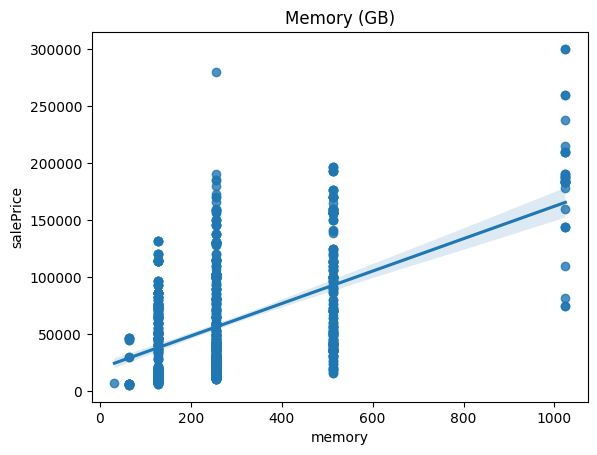

In [543]:
sns.regplot(data=df1, x='memory', y='salePrice')
plt.title('Memory (GB)')

<Axes: xlabel='None', ylabel='salePrice'>

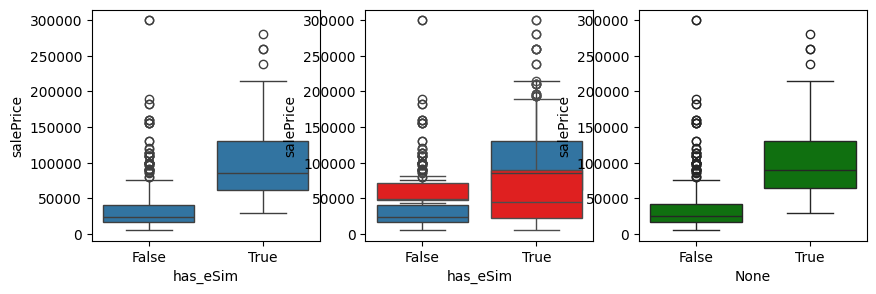

In [544]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.boxplot(ax=ax[0], data=df1, x='has_eSim', y='salePrice')
sns.boxplot(ax=ax[1], data=df1, x='has_eSim', y='salePrice')
sns.boxplot(ax=ax[1], data=df1, x='has_nano-SIM', y='salePrice', color='red')
sns.boxplot(ax=ax[2], data=df1, x=df1['has_nano-SIM'] & df1['has_eSim'], y='salePrice', color='green')

<Axes: xlabel='dop_res_v', ylabel='salePrice'>

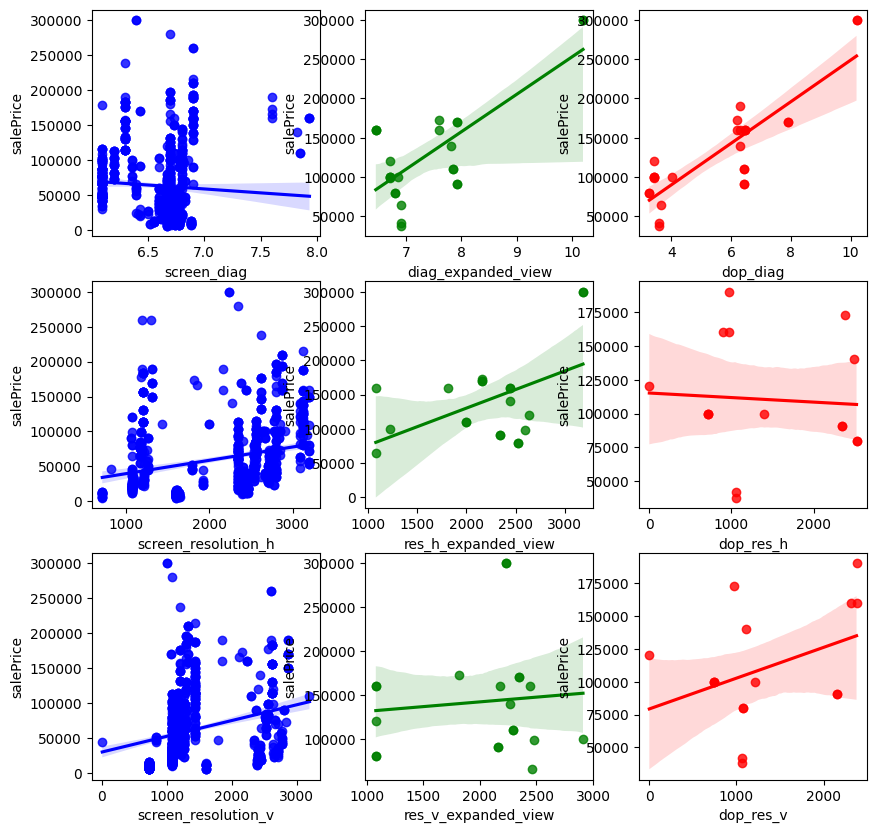

In [545]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

sns.regplot(ax=ax[0, 0], data=df1, x='screen_diag', y='salePrice', color='blue')
sns.regplot(ax=ax[0, 1], data=df1, x='diag_expanded_view', y='salePrice', color='green')
sns.regplot(ax=ax[0, 2], data=df1, x='dop_diag', y='salePrice', color='red')
sns.regplot(ax=ax[1, 0], data=df1, x='screen_resolution_h', y='salePrice', color='blue')
sns.regplot(ax=ax[1, 1], data=df1, x='res_h_expanded_view', y='salePrice', color='green')
sns.regplot(ax=ax[1, 2], data=df1, x='dop_res_h', y='salePrice', color='red')
sns.regplot(ax=ax[2, 0], data=df1, x='screen_resolution_v', y='salePrice', color='blue')
sns.regplot(ax=ax[2, 1], data=df1, x='res_v_expanded_view', y='salePrice', color='green')
sns.regplot(ax=ax[2, 2], data=df1, x='dop_res_v', y='salePrice', color='red')
# ax[0, 0].set_title('Цифровой зум (x)')
# ax[1, 0].set_title('Weight')
# ax[0, 1].set_title('Количество ядер')
# ax[1, 1].set_title('Volume')

Text(0.5, 1.0, 'Volume')

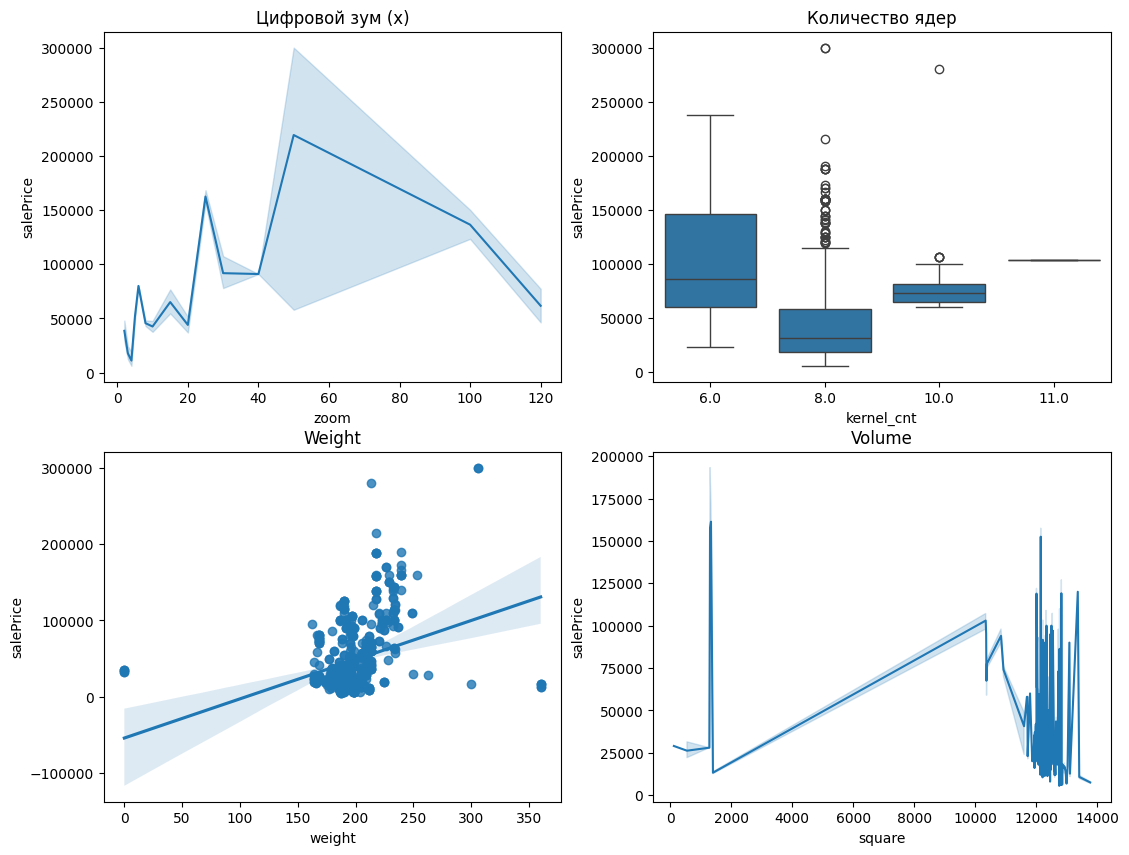

In [560]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))

sns.lineplot(ax=ax[0, 0], data=df1, x='zoom', y='salePrice')
sns.regplot(ax=ax[1, 0], data=df1, x='weight', y='salePrice')
sns.boxplot(ax=ax[0, 1], data=df1, x='kernel_cnt', y='salePrice')
sns.lineplot(ax=ax[1, 1], data=df1, x='square', y='salePrice')
ax[0, 0].set_title('Цифровой зум (x)')
ax[1, 0].set_title('Weight')
ax[0, 1].set_title('Количество ядер')
ax[1, 1].set_title('Volume')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'OLED'),
  Text(1, 0, 'AMOLED'),
  Text(2, 0, 'Super Retina XDR'),
  Text(3, 0, 'IPS'),
  Text(4, 0, 'Dynamic AMOLED 2X'),
  Text(5, 0, 'Super AMOLED'),
  Text(6, 0, 'TFT'),
  Text(7, 0, 'LED'),
  Text(8, 0, 'LCD'),
  Text(9, 0, 'Amoled'),
  Text(10, 0, 'LTPO OLED'),
  Text(11, 0, 'Super AMOLED Plus'),
  Text(12, 0, 'Retina HD'),
  Text(13, 0, '4K QLED')])

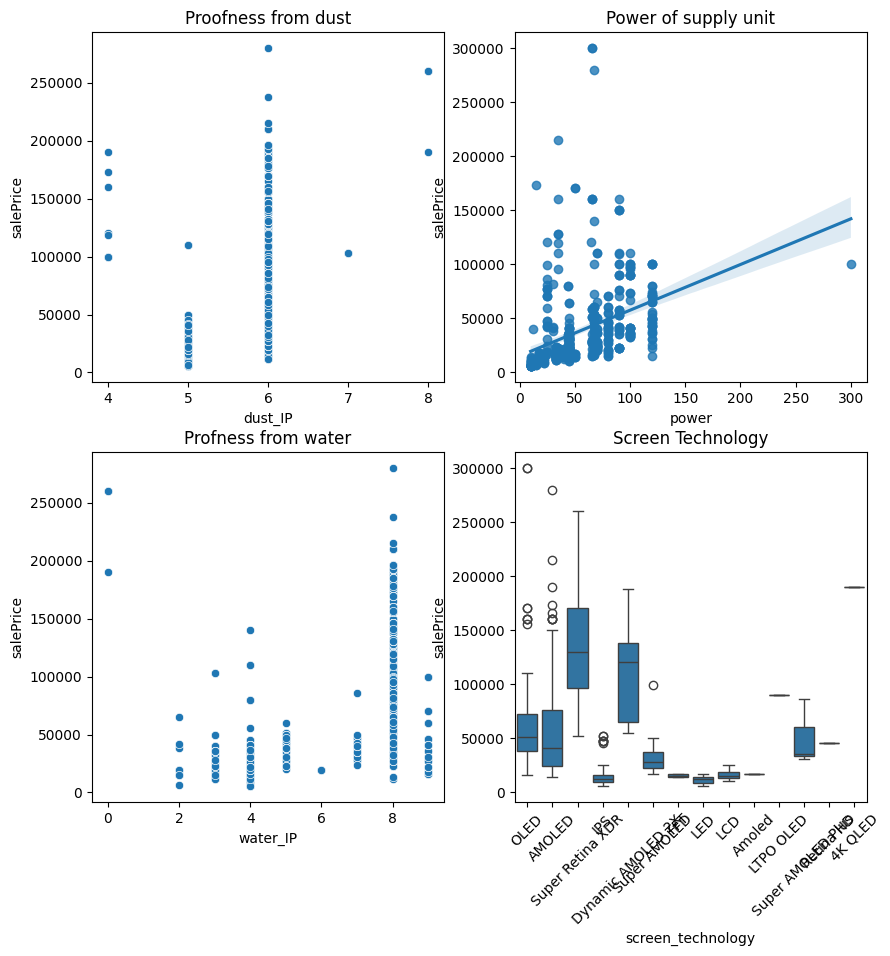

In [550]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(ax=ax[1, 1], data=df1, x='screen_technology', y='salePrice')
sns.regplot(ax=ax[0, 1], data=df1, x='power', y='salePrice')
sns.scatterplot(ax=ax[0, 0], data=df1, x='dust_IP', y='salePrice')
sns.scatterplot(ax=ax[1, 0], data=df1, x='water_IP', y='salePrice')
ax[1, 1].set_title('Screen Technology')
ax[0, 1].set_title('Power of supply unit')
ax[0, 0].set_title('Proofness from dust')
ax[1, 0].set_title('Profness from water')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Depth (mm)')

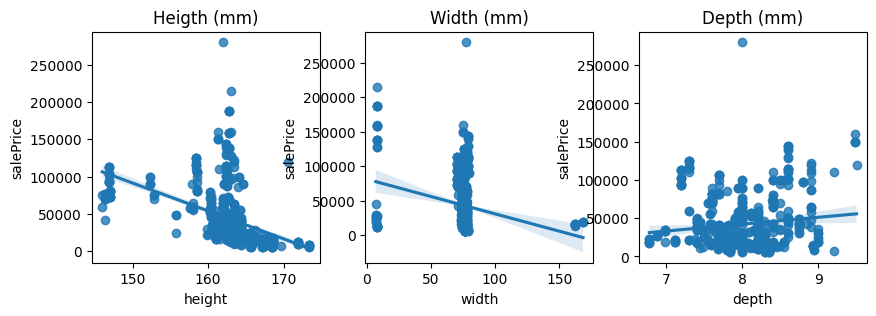

In [551]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.regplot(ax=ax[0], data=df1[df1['height'] > 100], x='height', y='salePrice')
sns.regplot(ax=ax[1], data=df1, x='width', y='salePrice')
sns.regplot(ax=ax[2], data=df1[df1['depth'] < 20], x='depth', y='salePrice')
ax[0].set_title('Heigth (mm)')
ax[1].set_title('Width (mm)')
ax[2].set_title('Depth (mm)')

Text(0.5, 1.0, 'Video resolution horizontal (Pixels)')

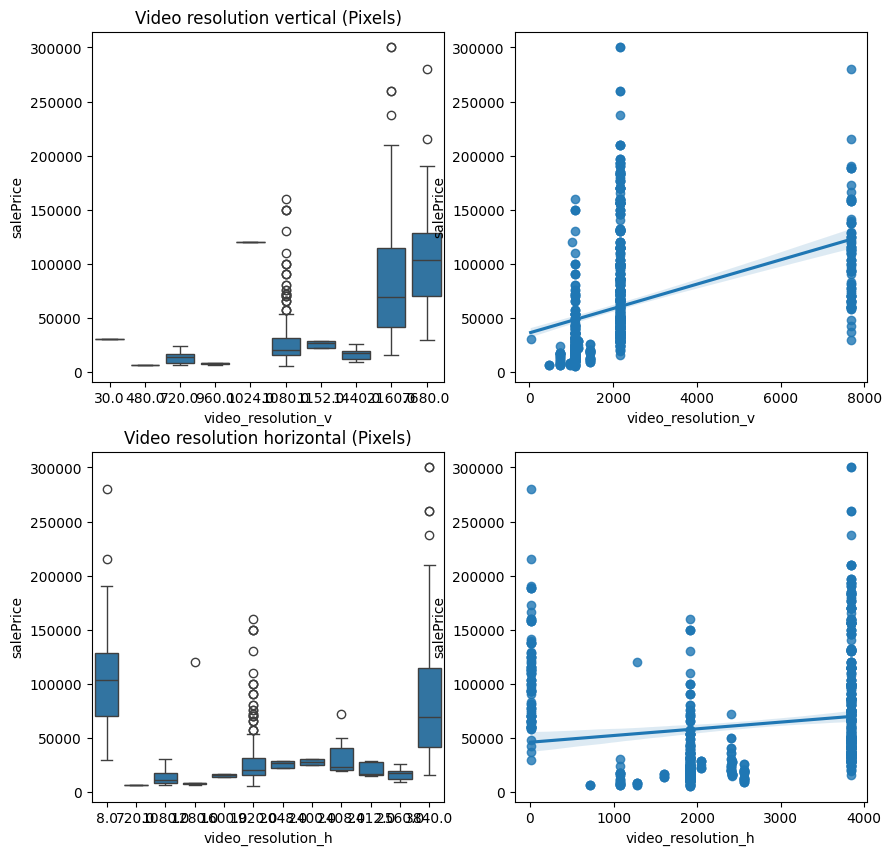

In [552]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(ax=ax[0, 0], data=df1, x='video_resolution_v', y='salePrice')
sns.boxplot(ax=ax[1, 0], data=df1, x='video_resolution_h', y='salePrice')
sns.regplot(ax=ax[0, 1], data=df1, x='video_resolution_v', y='salePrice')
sns.regplot(ax=ax[1, 1], data=df1, x='video_resolution_h', y='salePrice')
ax[0, 0].set_title('Video resolution vertical (Pixels)')
ax[1, 0].set_title('Video resolution horizontal (Pixels)')

# Trying to build some regressions

In [557]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Создаем пример данных
np.random.seed(42)
# data = pd.DataFrame({
#     'Price': np.random.normal(500, 200, 100),
#     'Weight': np.random.uniform(100, 250, 100),  # в граммах
#     'Memory': np.random.choice([32, 64, 128, 256], 100),  # в ГБ
#     'Screen_Resolution': np.random.choice(['HD', 'FullHD', '4K'], 100)
# })

# Преобразуем категориальную переменную
df2 = df1
# df2 = pd.get_dummies(df1, columns=['kernel_cnt'])
# df2['kernel_cnt_6'] = df2['kernel_cnt_6.0']
# df2['kernel_cnt_8'] = df2['kernel_cnt_8.0']

# Создаем модель для 25-го, 50-го и 75-го квантилей
quantiles = [0.25, 0.5, 0.75]
results = {}

for q in quantiles:
    formula = 'salePrice ~ weight + memory + height + depth + width + kernel_cnt + video_resolution_v + video_resolution_h'
    # formula = 'salePrice ~ weight + memory + height + depth + width + kernel_cnt_6 + kernel_cnt_8'
    model = smf.quantreg(formula, df2)
    results[q] = model.fit(q=q)
    
# Выводим результаты
for q, result in results.items():
    print(f"\nКвантиль {q*100}%")
    print(result.summary())



Квантиль 25.0%
                         QuantReg Regression Results                          
Dep. Variable:              salePrice   Pseudo R-squared:               0.4189
Model:                       QuantReg   Bandwidth:                       5790.
Method:                 Least Squares   Sparsity:                    2.039e+04
Date:                Sun, 27 Apr 2025   No. Observations:                  597
Time:                        14:22:47   Df Residuals:                      588
                                        Df Model:                            8
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           8.424e+04   2.39e+04      3.519      0.000    3.72e+04    1.31e+05
weight                36.6461     16.221      2.259      0.024       4.788      68.504
memory                49.3003      2.498     19.738      0.000      44.395      54.

/Users/naburkova/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [561]:
df1.columns

Index(['salePrice', 'product_id', 'name', 'memory', 'height', 'width', 'depth',
       'volume', 'video_resolution_v', 'video_resolution_h',
       'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'dust_IP',
       'water_IP', 'dop_diag', 'res_h_expanded_view', 'res_v_expanded_view',
       'diag_expanded_view', 'dop_res_v', 'dop_res_h', 'has_eSim',
       'has_nano-SIM', 'zoom', 'weight', 'kernel_cnt', 'screen_technology',
       'power', 'square'],
      dtype='object')

In [558]:
nan_counts = df2.isna().sum()
print(nan_counts[nan_counts > 0].sort_values(ascending=False))  


dop_res_h              913
dop_res_v              913
res_v_expanded_view    909
res_h_expanded_view    909
diag_expanded_view     904
dop_diag               902
power                  409
zoom                   290
depth                  266
volume                 266
width                  265
height                 265
square                 265
weight                 262
dust_IP                114
water_IP                89
video_resolution_h      55
video_resolution_v      55
screen_diag             30
screen_resolution_v     16
screen_resolution_h     16
screen_technology       15
kernel_cnt               5
dtype: int64


                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     131.0
Date:                Sun, 27 Apr 2025   Prob (F-statistic):          1.91e-198
Time:                        14:13:41   Log-Likelihood:                -10907.
No. Observations:                 929   AIC:                         2.184e+04
Df Residuals:                     915   BIC:                         2.191e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.226e+04   3.73

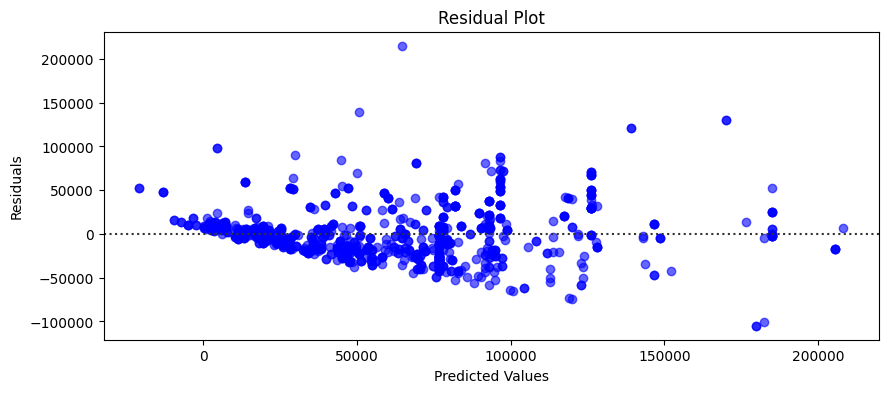

In [553]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


# Преобразуем категориальную переменную
df2 = df1.drop(columns=['name', 'product_id', 'screen_technology'])
df2 = df2.astype('float64').fillna(df2.mean()).astype(df2.dtypes)

# df2['kernel_cnt'] = pd.Categorical(df2['kernel_cnt'])
# df2['memory'] = pd.Categorical(df2['memory'])
# df2['video_resolution_v'] = pd.Categorical(df2['video_resolution_v'])
# df2['video_resolution_h'] = pd.Categorical(df2['video_resolution_h'])

# Создаем формулу для модели
# formula = 'salePrice ~ weight + memory + height + depth + width'
formula = 'salePrice ~ memory + height + width + depth + volume + video_resolution_v + video_resolution_h + dust_IP + water_IP + zoom + weight + kernel_cnt + power'
# Строим модель
model = smf.ols(formula=formula, data=df2)
result = model.fit()

# Выводим сводную статистику модели
print(result.summary())

# График остатков
plt.figure(figsize=(10, 4))
sns.residplot(x=result.fittedvalues, y=result.resid, color='blue', scatter_kws={'alpha': 0.6})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     62.97
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           8.54e-90
Time:                        12:56:26   Log-Likelihood:                -11173.
No. Observations:                 929   AIC:                         2.237e+04
Df Residuals:                     919   BIC:                         2.241e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.266e+05   9

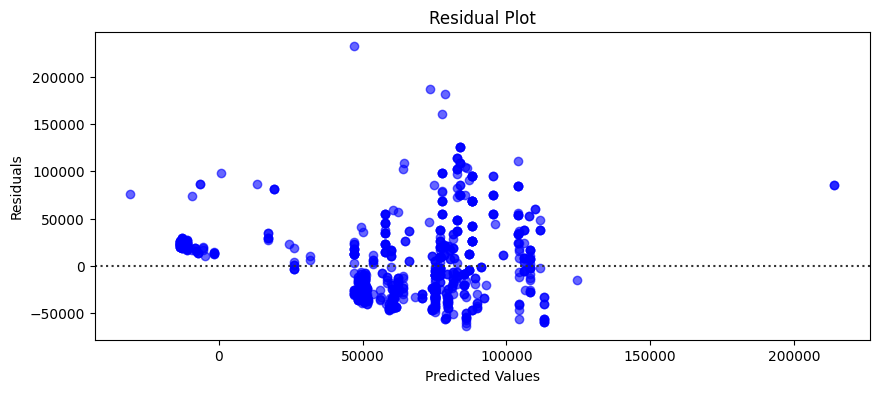

In [500]:
formula = 'salePrice ~ screen_diag + diag_expanded_view + dop_diag + screen_resolution_h + res_h_expanded_view + dop_res_h + screen_resolution_v + res_v_expanded_view + dop_res_v'
# '+ weight + memory + height + depth + width + kernel_cnt + video_resolution_v + video_resolution_h'
model = smf.ols(formula=formula, data=df2)
result = model.fit()

# Выводим сводную статистику модели
print(result.summary())

# График остатков
plt.figure(figsize=(10, 4))
sns.residplot(x=result.fittedvalues, y=result.resid, color='blue', scatter_kws={'alpha': 0.6})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [568]:
!python3 -m pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 307 kB 4.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [604]:
df1['is_5G'] = df['Поддержка стандартов'].apply(lambda x: int('5G' in x) if type(x) == str else 0)

In [606]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df1.drop('salePrice', axis=1)
y = df1['salePrice']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Предварительная обработка данных
numeric_features = ['memory', 'height', 'width', 'depth', 'square', 'video_resolution_v', 'video_resolution_h',
                    'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'weight', 'battery_bin']
categorical_features = ['brand', 'Материал корпуса', 'is_5G', 'Год релиза', 'Поддержка быстрой зарядки',
                        'Поддержка беспроводной зарядки', 'Гарантия предоставляется', 'Страна']

# Масштабирование числовых признаков
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# One-hot encoding категориальных признаков
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Объединение числовых и категориальных признаков
X_train_final = pd.concat([X_train[numeric_features], pd.DataFrame(X_train_encoded.toarray())], axis=1)
X_test_final = pd.concat([X_test[numeric_features], pd.DataFrame(X_test_encoded.toarray())], axis=1)

X_train_final = X_train_final.rename(str,axis="columns") 
X_test_final = X_test_final.rename(str,axis="columns") 

X_train_final

# # X_train_final

# # Обучение моделей
# models = {
#     'Linear Regression': LinearRegression(),
#     'SVR': SVR(kernel='rbf'),
#     'Random Forest': RandomForestRegressor(n_estimators=100),
#     'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
# }

# results = {}
# for name, model in models.items():
#     model.fit(X_train_final, y_train)
#     y_pred = model.predict(X_test_final)
    
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
    
#     results[name] = {'MAE': mae, 'MSE': mse}
    
#     print(f"{name}:")
#     print(f"MAE: {mae:.2f}")
#     print(f"MSE: {mse:.2f}\n")


,memory,height,width,depth,square,video_resolution_v,video_resolution_h,screen_resolution_h,screen_resolution_v,screen_diag,...,63,64,65,66,67,68,69,70,71,72
381,-0.851026,0.145001,0.211897,-0.228307,0.334485,2.800503,-2.017365,0.212543,-0.578664,0.335306,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
499,-0.198990,NaN,NaN,NaN,NaN,-0.057159,0.954186,0.874467,-0.235944,0.335306,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
97,-0.851026,0.524408,0.196893,-0.187011,0.496290,-0.616267,-0.534692,-0.905777,-1.183464,0.523267,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
250,-0.198990,0.108867,0.056851,-0.183903,0.131822,-0.616267,-0.534692,-1.480050,2.163096,0.222529,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
198,-0.851026,0.542475,-3.239132,2.804495,-3.788762,-0.616267,-0.534692,0.303218,-0.578664,0.673635,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
